In [26]:
import matplotlib.pyplot as plt
import re

%matplotlib inline

def line_parser(line):
    res = {'type': '', 'loss': [], 'acc': []}
    mo = re.compile(r'= (.*) ([\d]*) Loss: (.*) Acc: (.*)\%', re.M|re.I)
    return mo.match(line)

def data_yield(filepath, max_epoch=-1):
    fp = open(filepath, 'r')
    for line in fp.readlines():
        m = line_parser(line)
        if m and m.group():
            type = m.group(1)
            epoch = int(m.group(2))
            loss = float(m.group(3))
            acc = float(m.group(4))

            if max_epoch < 0 or epoch < max_epoch:
                yield (type, epoch, loss, acc)

def log_parser(filepath, max_epoch=-1):
    train_acc = []
    train_loss = []
    test_acc = []
    test_loss = []
    train_epoch = []
    test_epoch = []
    for type, epoch, loss, acc in data_yield(filepath, max_epoch):
        if (type and 'Epoch' in type):
            train_acc.append(acc)
            train_loss.append(loss)
            train_epoch.append(epoch)
        elif (type and 'Eval' in type):
            test_acc.append(acc)
            test_loss.append(loss)
            test_epoch.append(epoch)

    return train_epoch, train_loss, train_acc, test_epoch, test_loss, test_acc
            
def draw_plot(fig, train_epoch, train_loss, train_acc, test_epoch, test_loss, test_acc):
    ax = fig.add_subplot(111)
    lns1 = ax.plot(train_epoch, train_loss, label='Loss(Train)', color='pink')
    lns2 = ax.plot(test_epoch, test_loss, label='Loss(Test)', color='lightblue')
    ax2 = ax.twinx()
    lns3 = ax2.plot(train_epoch, train_acc, label='Acc(Train)', color='b')
    lns4 = ax2.plot(test_epoch, test_acc, label='Acc(Test)', color='r')

    lns = lns1+lns2+lns3+lns4
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=2)

    ax.set_ylim(0, max(train_loss + test_loss) * 1.5)
    ax2.set_ylim(0, 100)

def logplot(fig, max_epoch, filepath):
    train_epoch, train_loss, train_acc, test_epoch, test_loss, test_acc = log_parser(filepath, max_epoch)
    if (len(train_epoch) == 0 and len(test_epoch) == 0):
        return
    draw_plot(fig, train_epoch, train_loss, train_acc, test_epoch, test_loss, test_acc)
    


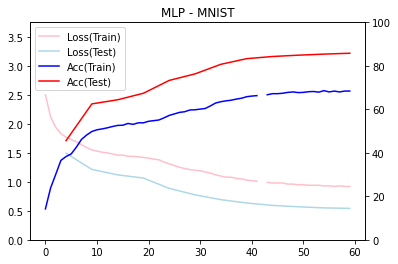

In [27]:
fig = plt.figure(0)
logplot(fig, 60, 'build/bin/mlp_mnist_training.log')
plt.title('MLP - MNIST')
fig.savefig('sample/mlp_mnist.jpg')


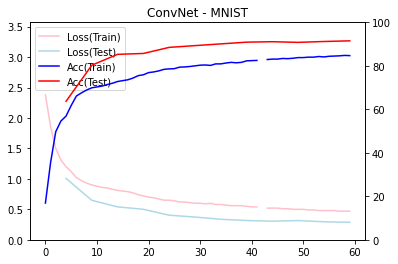

In [28]:
fig = plt.figure(1)
logplot(fig, 60, 'build/bin/conv_mnist_training.log')
plt.title('ConvNet - MNIST')
fig.savefig('sample/conv_mnist.jpg')

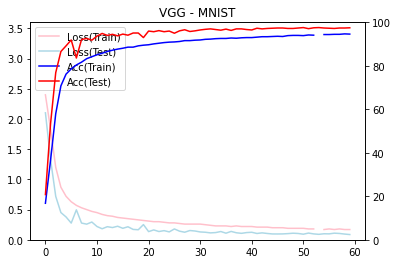

In [29]:
fig = plt.figure(2)
logplot(fig, 60, 'build/bin/vgg_mnist_training.log')
plt.title('VGG - MNIST')
fig.savefig('sample/vgg_mnist.jpg')

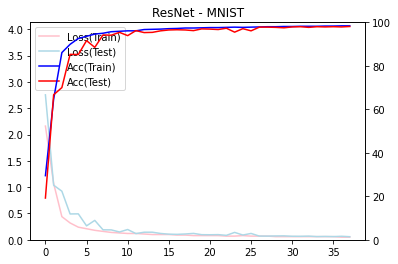

In [30]:
fig = plt.figure(3)
logplot(fig, 60, 'build/bin/resnet_mnist_training.log')
plt.title('ResNet - MNIST')
fig.savefig('sample/resnet_mnist.jpg')